<a href="https://colab.research.google.com/github/Sayantankhan/colabNoteBook/blob/main/SPECTOGRAM_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Audio Finger Print-Generator - Spectrogram and Match Tunes**

In [27]:
!pip install ffmpeg-python
!pip install matplotlib
!pip install scipy
!pip install numpy

In [2]:
from google.colab import files
uploaded = files.upload()

!chmod -R 755 /content

Saving Beach_House_Space_Song.mp3 to Beach_House_Space_Song.mp3


In [ ]:
import sqlite3
conn = sqlite3.connect('sample_db.sqlite')

cursor = conn.cursor()

def _save_song_to_database():
    print("hello")

def _get_songs_by_song_id():
    print("hello")

In [3]:
!mkdir Beach_House_Space_Song

In [4]:
import ffmpeg

#print(uploaded['Beach House - Space Song.mp3'])
song_name = "Beach_House_Space_Song"
audio_input = ffmpeg.input('/content/Beach_House_Space_Song.mp3')


# Define segment duration (in seconds)
segment_duration = 15

# Get the duration of the audio
probe = ffmpeg.probe('/content/Beach_House_Space_Song.mp3')
duration = float(probe['format']['duration'])

# Loop over the audio and create segments
for i in range(0, int(duration), segment_duration):
    output_file = f'/content/{song_name}/output_segment_{i//segment_duration + 1}.wav'

    # Create a segment
    ffmpeg.output(audio_input.audio.filter('atrim', start=i, end=min(i+segment_duration, duration)),
                  output_file).run()

In [5]:
!ls /content/Beach_House_Space_Song
# !rm -rf /content/Beach_House_Space_Song/

output_segment_10.wav  output_segment_16.wav  output_segment_21.wav  output_segment_6.wav
output_segment_11.wav  output_segment_17.wav  output_segment_22.wav  output_segment_7.wav
output_segment_12.wav  output_segment_18.wav  output_segment_2.wav   output_segment_8.wav
output_segment_13.wav  output_segment_19.wav  output_segment_3.wav   output_segment_9.wav
output_segment_14.wav  output_segment_1.wav   output_segment_4.wav
output_segment_15.wav  output_segment_20.wav  output_segment_5.wav


In [ ]:
! cd /content/Beach_House_Space_Song/
! rm -rf *

In [35]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('/content/Beach_House_Space_Song/output_segment_7.wav')

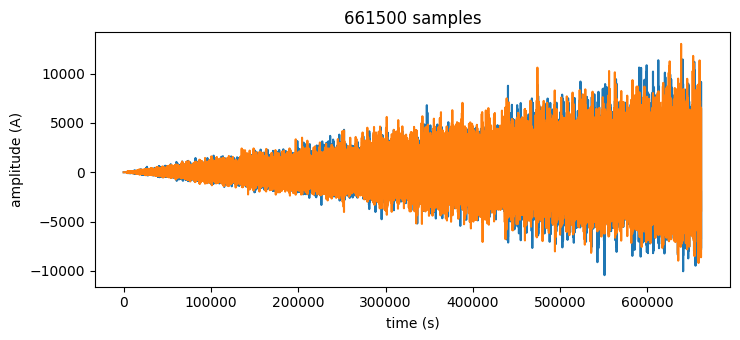

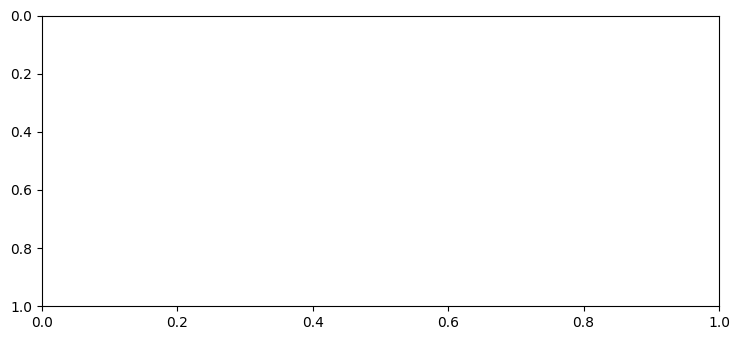

In [16]:
plt.plot(samples)
plt.title('%d samples' % len(samples))
plt.xlabel('time (s)')
plt.ylabel('amplitude (A)')
plt.show()
plt.gca().invert_yaxis()

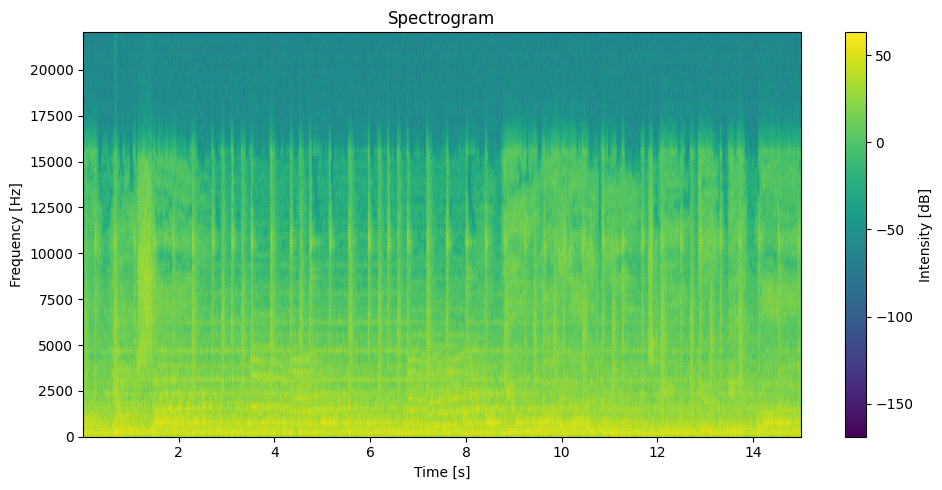

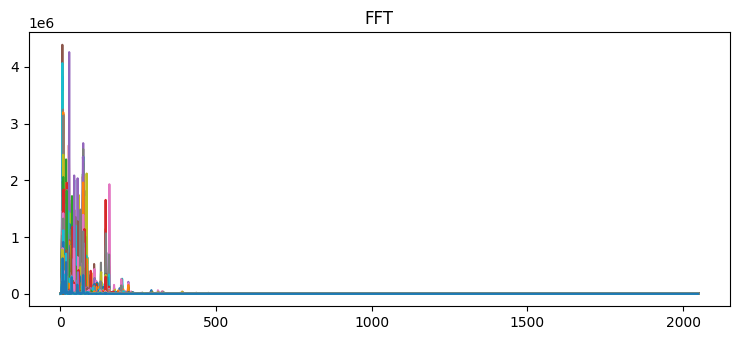

In [36]:
import numpy as np

# Ensure samples are in 1D array if stereo (multi-channel)
if len(samples.shape) > 1:
    samples = np.mean(samples, axis=1)  # Convert to mono by averaging channels

# # Adjust nperseg to avoid the warning
nperseg = min(256, len(samples))

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nperseg=nperseg)

# Handle case where spectrogram contains zero values
spectrogram = np.where(spectrogram == 0, np.finfo(float).eps, spectrogram)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.show()



# Sampling rate, related to the Nyquist conditions, which affects
# the range frequencies we can detect.
DEFAULT_FS = 44100

# Size of the FFT window, affects frequency granularity
DEFAULT_WINDOW_SIZE = 4096

# Ratio by which each sequential window overlaps the last and the
# next window. Higher overlap will allow a higher granularity of offset
# matching, but potentially more fingerprints.
DEFAULT_OVERLAP_RATIO = 0.5

import matplotlib.mlab as mlab
arr2D = mlab.specgram(
        samples,
        NFFT=DEFAULT_WINDOW_SIZE,
        Fs=DEFAULT_FS,
        window=mlab.window_hanning,
        noverlap=int(DEFAULT_WINDOW_SIZE * DEFAULT_OVERLAP_RATIO))[0]

# show spectrogram plot
plt.plot(arr2D)
plt.title('FFT')
plt.show()
